In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Loan_Data.csv")
df.head()


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [3]:
df['default'].value_counts()
df['default'].value_counts(normalize=True) * 100


default
0    81.49
1    18.51
Name: proportion, dtype: float64

In [4]:
df.groupby('default')['fico_score'].mean()


default
0    646.938765
1    596.257699
Name: fico_score, dtype: float64

In [5]:
df.groupby('default')['income'].mean()


default
0    69883.889804
1    70726.740140
Name: income, dtype: float64

In [6]:
df.groupby('default')['total_debt_outstanding'].mean()


default
0     6322.164549
1    19270.582961
Name: total_debt_outstanding, dtype: float64

In [7]:
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']
df.groupby('default')['debt_to_income'].mean()


default
0    0.090381
1    0.272105
Name: debt_to_income, dtype: float64

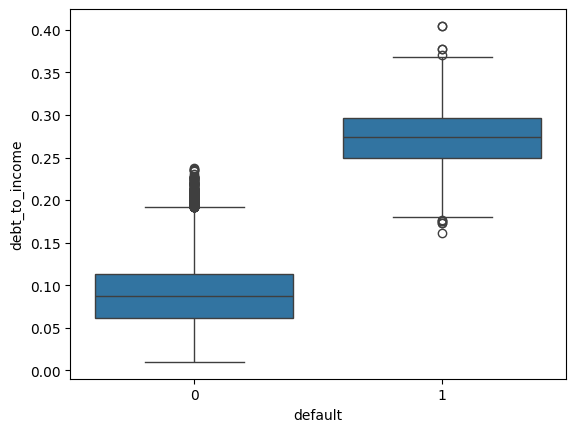

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='default', y='debt_to_income', data=df)
plt.show()


In [9]:
df.groupby('default')['years_employed'].mean()


default
0    4.765247
1    3.617504
Name: years_employed, dtype: float64

In [10]:
df_model = df.drop(columns=['customer_id'])
df_model.head()


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,debt_to_income
0,0,5221.545193,3915.471226,78039.38546,5,605,0,0.050173
1,5,1958.928726,8228.752520,26648.43525,2,572,1,0.308789
2,0,3363.009259,2027.830850,65866.71246,4,602,0,0.030787
3,0,4766.648001,2501.730397,74356.88347,5,612,0,0.033645
4,1,1345.827718,1768.826187,23448.32631,6,631,0,0.075435


In [11]:
X = df_model.drop('default', axis=1)
y = df_model['default']

X.shape, y.shape


((10000, 7), (10000,))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((8000, 7), (2000, 7))

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.997

Confusion Matrix:
 [[1652    0]
 [   6  342]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       1.00      0.98      0.99       348

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [19]:
import pickle

pickle.dump(model, open("credit_model.pkl", "wb"))
